In [1]:
import re
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from collections import defaultdict
%matplotlib inline

In [2]:
color = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(color)):    
    r, g, b = color[i]    
    color[i] = (r / 255., g / 255., b / 255.)

In [3]:
models = ['brescal', 'bcomp_mul', 'bcomp_add', 'bcomp_mul_10', 
          'bcomp_add_10', 'bcomp_mul_comp_10', 'bcomp_add_comp_10',
          'bcomp_mul_var_1_comp_10','bcomp_add_var_1_comp_10']

models = ['brescal', 'bcomp_mul', 'bcomp_add']

model_colors = {'brescal':color[0], 'amdc_pop':color[8], 'amdc_pred':color[7], 
                'bcomp_mul':color[2], 'bcomp_add':color[3], 'logit':color[5], 
                'rescal':'grey',
                'brescal_passive':'grey', 'bcomp_mul_10': color[8], 'bcomp_add_10':color[9], 
                'bcomp_mul_comp_10':color[11], 'bcomp_add_comp_10':color[13], 
                'bcomp_mul_var_1_comp_10': color[15], 'bcomp_add_var_1_comp_10': color[17]}

model_names = {'rescal':'rescal', 'brescal':'pnormal-ts', 'amdc_pop':'amdc_pop', 'amdc_pred':'amdc_pred', 
               'bcomp_mul':'pcomp-mul-ts', 'bcomp_add':'pcomp-add-ts', 'logit':'blogit', 
               'brescal_passive':'brescal_passive'}

data_lim = {'kinship':2000, 'umls':2000, 'nation':1000}
cumsum_lim = {'kinship':10000, 'umls':10000, 'nation':4000}

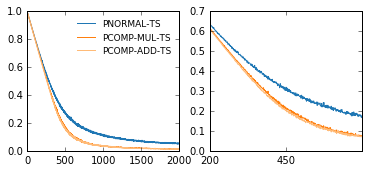

In [5]:
datasets = ['nation','kinship','umls']
datasets = ['kinship']
for dataset in datasets:
#dataset = 'nation'

    x_lim = data_lim[dataset]
    second_start = x_lim/2

    file_name = {'brescal':'brescal_var_%s.out' % (dataset), 
                 'bcomp_mul':'bcomp_mul_var_%s.out' % (dataset),
                 'bcomp_add':'bcomp_add_var_%s.out' % (dataset),
#                 'bcomp_mul':'bcomp_mul_var_10_comp_var_1000_%s.out' % (dataset),
#                 'bcomp_add':'bcomp_add_var_10_comp_var_1000_%s.out' % (dataset),
                 'bcomp_mul_10':'bcomp_mul_var_er_10_%s.out' % (dataset),
                 'bcomp_add_10':'bcomp_add_var_er_10_%s.out' % (dataset),              
                 'bcomp_mul_comp_10':'bcomp_mul_comp_var_10_%s.out' % (dataset),
                 'bcomp_add_comp_10':'bcomp_add_comp_var_10_%s.out' % (dataset),
                 'bcomp_mul_var_1_comp_10': 'bcomp_mul_var_1_comp_var_10_%s.out' % (dataset),
                 'bcomp_add_var_1_comp_10': 'bcomp_add_var_1_comp_var_10_%s.out' % (dataset)
                }

    legend_size = 9

#    fig = plt.figure(figsize=(18,5))
    fig = plt.figure(figsize=(6,2.5))
    for model in models:
        filepath = '../result_posterior_variance/%s' % file_name[model]
        if os.path.exists(filepath):
            logs = open(filepath, 'r').readlines()
            e_p  = re.compile(r'Mean variance E, ([0-9]+), ([0-9]+.[0-9]+|[0-9]+)')
            r_p  = re.compile(r'Mean variance R, ([0-9]+), ([0-9]+.[0-9]+|[0-9]+)')
            e_vars = defaultdict(list)
            for line in logs:
                m = e_p.search(line)
                if m is not None:
                    en = int(m.group(1))
                    e_vars[en].append(float(m.group(2)))
            mean_var = np.zeros(x_lim)
            cnt = 0
            for key in e_vars.keys():
                mean_var += e_vars[key][::10][:x_lim]
                cnt += 1.
            mean_var /= cnt
            c = model_colors[model]
            model_name = model_names[model].upper()
            plt.subplot(1, 2, 1)        
            plt.plot(mean_var, label=model_name, color=c)
            plt.subplot(1, 2, 2)
#             plt.plot(mean_var[second_start:], label=model_name, color=c)
            plt.plot(mean_var[200:700], label=model_name, color=c)            
            plt.xticks(np.arange(0, 500, 250), np.arange(200, 700, 250))
    plt.subplot(1, 2, 1)    
    plt.legend(loc='upper right', numpoints=1, frameon=False, prop={'size':legend_size})
#     plt.title(dataset.upper())
    plt.savefig('../paper/cikm2016/images/posterior_variance_trace_%s.pdf' % dataset, format='PDF', bbox_inches='tight', pad_inches=0.1)

#     plt.subplot(1, 3, 3)
    
#     x_lim = cumsum_lim[dataset]
#     for model in models:
#         filepath = '../result_posterior_variance/%s' % file_name[model]
#         if os.path.exists(filepath):
#             logs = open(filepath, 'r').readlines()
#             p_p = re.compile(r'population: ([0-9]+)/([0-9]+)')

#             population = list()
#             for line in logs:
#                 m = p_p.search(line)
#                 if m is not None:
#                     population.append(int(m.group(1)))

#             c = model_colors[model]
#             model_name = model_names[model].upper()
#             plt.plot(population[:x_lim*2:2], label=model_name, color=c)
#             print(model, len(population), population[-1])
#     plt.legend(loc='upper left', numpoints=1, frameon=False, prop={'size':legend_size})
#     #plt.savefig('../paper/cikm2016/images/.pdf', format='PDF', bbox_inches='tight', pad_inches=0.1)

# Beta-Bernoulli Model Posterior Variance Trace Plot

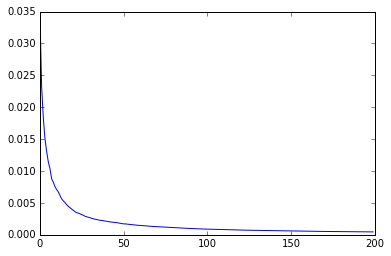

In [153]:
theta = 0.9
alpha = 0.1
beta = 0.1

max_trial = 200
max_test = 100

vars = np.zeros([max_test, max_trial])
for n_test in range(max_test):
    obs = list()
    for i in range(max_trial):
        x = np.random.binomial(1, theta, size=1)
        obs.append(x)
        new_alpha = i+1-np.sum(obs) + alpha
        new_beta = np.sum(obs) + beta
        var = new_alpha*new_beta/((new_alpha+new_beta)*(new_alpha+new_beta)*(new_alpha+new_beta+1))
        vars[n_test,i] = var

plt.plot(np.mean(vars, 0))